# Import libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [67]:
# Read dataset, remove unnamed col
df = pd.read_csv('icu-patients.csv', index_col=[0])

# Convert Dataset to tidy format

In [68]:
df = df.melt(id_vars=['ID'], value_vars=df.columns[1:])
df.rename(columns={'variable': 'Feature', 'value': 'Value'}, inplace=True)
df = df.pivot_table(index='ID', columns='Feature', values='Value')
df.reset_index(inplace=True)

# Store format into database

In [69]:
# Store the tidy dataset into a SQLite3 database
conn = sqlite3.connect('icu-patients.db')
df.to_sql('icu_dataset', conn, if_exists='replace')

200

# Get pandas dataframe from database

In [70]:
df = pd.read_sql("""SELECT  ID, Age, AgeGroup, Emergency, Infection, Pulse, Sex, Survive, SysBP 
                    FROM    icu_dataset""", conn)

# Exploratory Data Analysis

In [71]:
df

,ID,Age,AgeGroup,Emergency,Infection,Pulse,Sex,Survive,SysBP
0,4,87,3,1,1,96,1,0,80
1,8,27,1,1,1,88,1,1,142
2,12,59,2,1,0,80,0,1,112
3,14,77,3,0,0,70,0,1,100
4,27,76,3,1,1,90,1,0,128
...,...,...,...,...,...,...,...,...,...
195,921,50,2,1,0,64,1,0,256
196,923,20,1,1,0,83,0,1,104
197,924,73,3,1,0,100,1,1,162
198,925,59,2,1,0,88,0,1,100


In [72]:
# Get some basic info of dataframe
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         200 non-null    int64
 1   Age        200 non-null    int64
 2   AgeGroup   200 non-null    int64
 3   Emergency  200 non-null    int64
 4   Infection  200 non-null    int64
 5   Pulse      200 non-null    int64
 6   Sex        200 non-null    int64
 7   Survive    200 non-null    int64
 8   SysBP      200 non-null    int64
dtypes: int64(9)
memory usage: 14.2 KB


(200, 9)

In [73]:
df.describe()

,ID,Age,AgeGroup,Emergency,Infection,Pulse,Sex,Survive,SysBP
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,444.82000,57.545000,2.025000,0.735000,0.420000,98.92500,0.380000,0.800000,132.280000
std,271.91668,20.054648,0.785788,0.442441,0.494797,26.82962,0.486604,0.401004,32.952099
min,4.00000,16.000000,1.000000,0.000000,0.000000,39.00000,0.000000,0.000000,36.000000
25%,210.25000,46.750000,1.000000,0.000000,0.000000,80.00000,0.000000,1.000000,110.000000
50%,412.50000,63.000000,2.000000,1.000000,0.000000,96.00000,0.000000,1.000000,130.000000
75%,671.75000,72.000000,3.000000,1.000000,1.000000,118.25000,1.000000,1.000000,150.000000
max,929.00000,92.000000,3.000000,1.000000,1.000000,192.00000,1.000000,1.000000,256.000000


C:\Users\TQ\AppData\Local\Temp\ipykernel_11192\2917890868.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


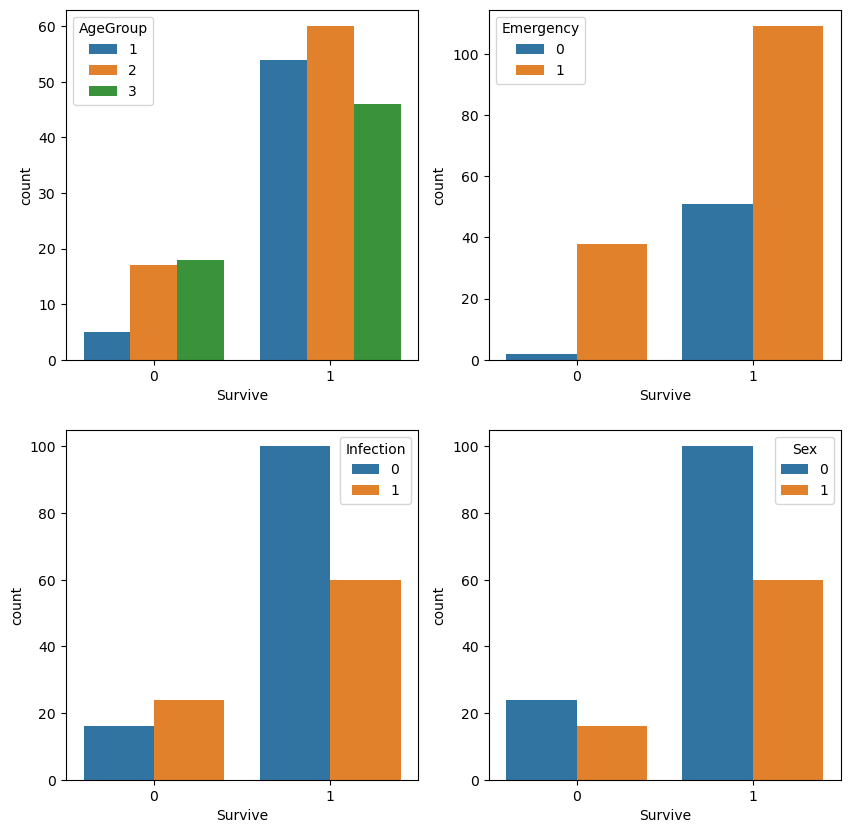

In [74]:
fig, ax = plt.subplots(2,2, figsize=(10, 10))
sns.countplot(x='Survive', hue='AgeGroup', data=df, ax=ax[0,0])
sns.countplot(x='Survive', hue='Emergency', data=df, ax=ax[0,1])
sns.countplot(x='Survive', hue='Infection', data=df, ax=ax[1,0])
sns.countplot(x='Survive', hue='Sex', data=df, ax=ax[1,1])
fig.show()

C:\Users\TQ\AppData\Local\Temp\ipykernel_11192\2728931412.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


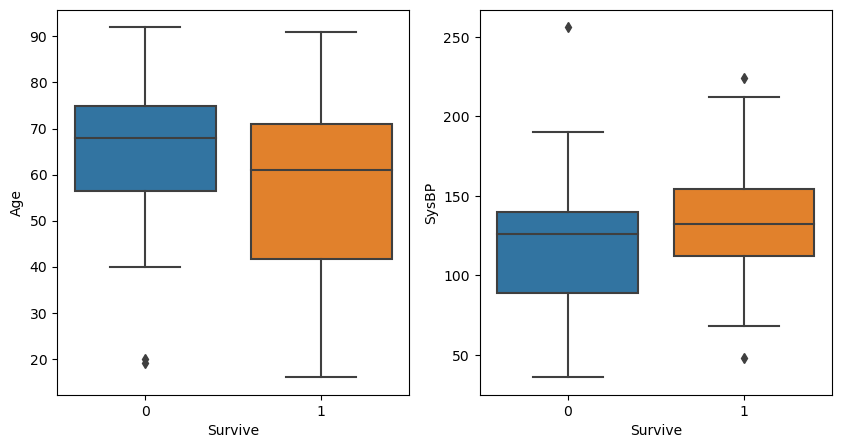

In [75]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(data=df, x='Survive', y='Age', ax=ax[0])
sns.boxplot(data=df, x='Survive', y='SysBP', ax=ax[1])
fig.show()

C:\Users\TQ\AppData\Local\Temp\ipykernel_11192\3221558942.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


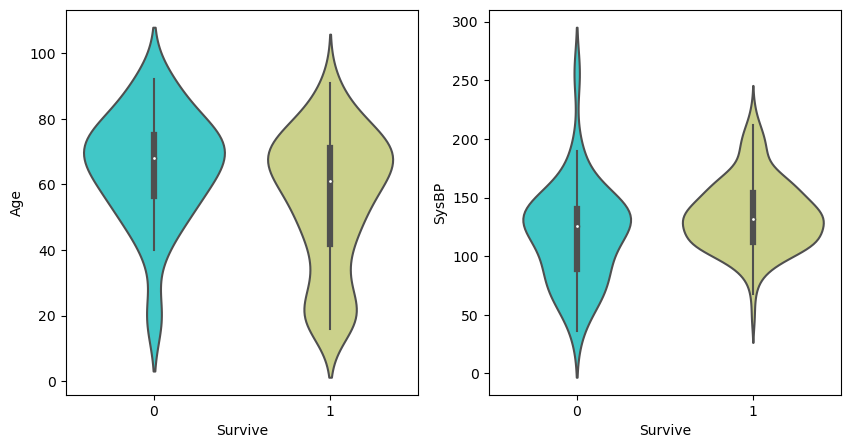

In [76]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.violinplot(data=df, x='Survive', y='Age', palette='rainbow', ax=ax[0])
sns.violinplot(data=df, x='Survive', y='SysBP', palette='rainbow', ax=ax[1])
fig.show()

Text(0.5, 0, 'Age')

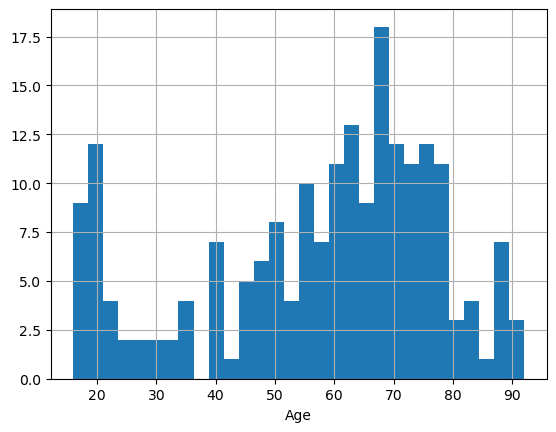

In [77]:
df['Age'].hist(bins=30)
plt.xlabel('Age')

Text(0.5, 0, 'SysBP')

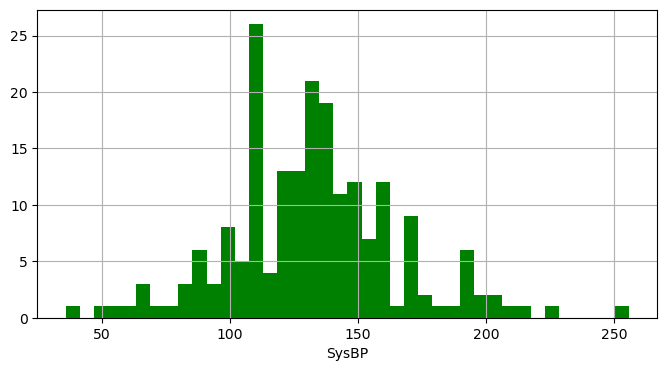

In [78]:
df['SysBP'].hist(color='green',bins=40,figsize=(8,4))
plt.xlabel('SysBP')

Text(0.5, 1.0, 'df.corr()')

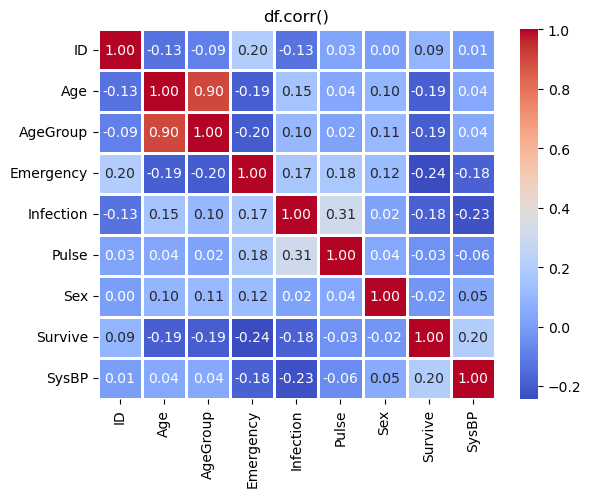

In [79]:
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='coolwarm',linewidths=1)
plt.title('df.corr()')

# Find optimal hyperparameters for each model

In [80]:
# Prepare the data for modeling
X = df.drop(['Survive', 'ID'], axis=1)
y = df['Survive']

# Split the data into training and testing sets, 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [81]:
# Declare the models and the params to optimise with
model_params = {
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear'),
        'params': {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                   'penalty': ['None', 'l1', 'l2', 'elasticnet'],
                   'max_iter': [100, 500, 1000, 2000]}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {'criterion': ['gini', 'entropy', 'log_loss'],
                   'splitter': ['best', 'random']}
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {'n_estimators': [1, 5, 10, 100],
                    'criterion': ['gini', 'entropy', 'log_loss']}
    }
}

In [83]:
%%capture --no-display

scores = []
k_fold = [5, 10]

for i in k_fold:
    for m_name, m_param in model_params.items():    

        # Use cross fold validation to reduce overfitting and obtain better estimate of performance.
        clf =  GridSearchCV(m_param['model'], m_param['params'], cv=i)
        clf.fit(X_train, y_train)
        scores.append({
            'model': m_name,
            'k-fold': i,
            'best_score': clf.best_score_,
            'best_params': clf.best_params_,
        })

res = pd.DataFrame(scores,columns=['model', 'k-fold', 'best_score', 'best_params'])
res

,model,k-fold,best_score,best_params
0,logistic_regression,5,0.83125,"{'C': 1, 'max_iter': 100, 'penalty': 'l2'}"
1,decision_tree,5,0.76250,"{'criterion': 'entropy', 'splitter': 'random'}"
2,random_forest,5,0.81250,"{'criterion': 'log_loss', 'n_estimators': 100}"
3,logistic_regression,10,0.81875,"{'C': 1, 'max_iter': 100, 'penalty': 'l1'}"
4,decision_tree,10,0.75000,"{'criterion': 'gini', 'splitter': 'random'}"
5,random_forest,10,0.81250,"{'criterion': 'log_loss', 'n_estimators': 100}"


# Prediction using best hyperparemeters

In [22]:
logreg = LogisticRegression(solver='liblinear', C=1, max_iter=100, penalty='l2')
logreg.fit(X_train, y_train)                    
predictions = logreg.predict(X_test)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.33      0.12      0.18         8
           1       0.81      0.94      0.87        32

    accuracy                           0.78        40
   macro avg       0.57      0.53      0.53        40
weighted avg       0.72      0.78      0.73        40

[[ 1  7]
 [ 2 30]]


In [84]:
d_tree = DecisionTreeClassifier(criterion='log_loss') # default for splitter is 'best', so no need to specify
d_tree.fit(X_train, y_train)                        
predictions = d_tree.predict(X_test)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.20      0.12      0.15         8
           1       0.80      0.88      0.84        32

    accuracy                           0.73        40
   macro avg       0.50      0.50      0.49        40
weighted avg       0.68      0.72      0.70        40

[[ 1  7]
 [ 4 28]]


In [25]:
rfc = RandomForestClassifier(criterion='gini') # default for n_estimators is 100, so no need to specify
rfc.fit(X_train, y_train)                         
predictions = rfc.predict(X_test)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.25      0.12      0.17         8
           1       0.81      0.91      0.85        32

    accuracy                           0.75        40
   macro avg       0.53      0.52      0.51        40
weighted avg       0.69      0.75      0.72        40

[[ 1  7]
 [ 3 29]]


In [7]:
# Close db connection once done
conn.close()